## 房价预测

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

from scipy import stats
from scipy.stats import norm

In [3]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

train_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


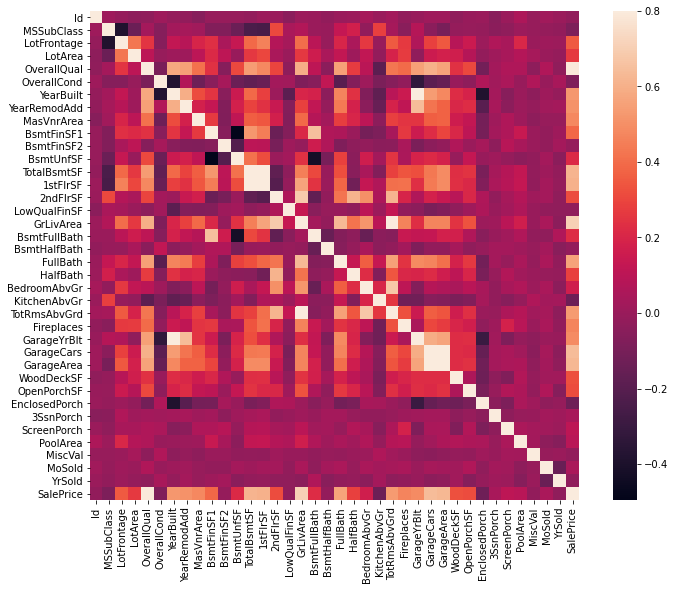

In [5]:
sample = pd.read_csv('data/sample_submission.csv')
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

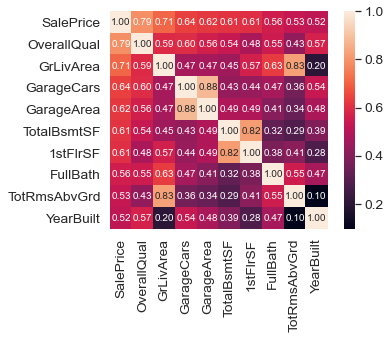

In [6]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

D:\devenv\Anaconda3\envs\kaggleenv\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


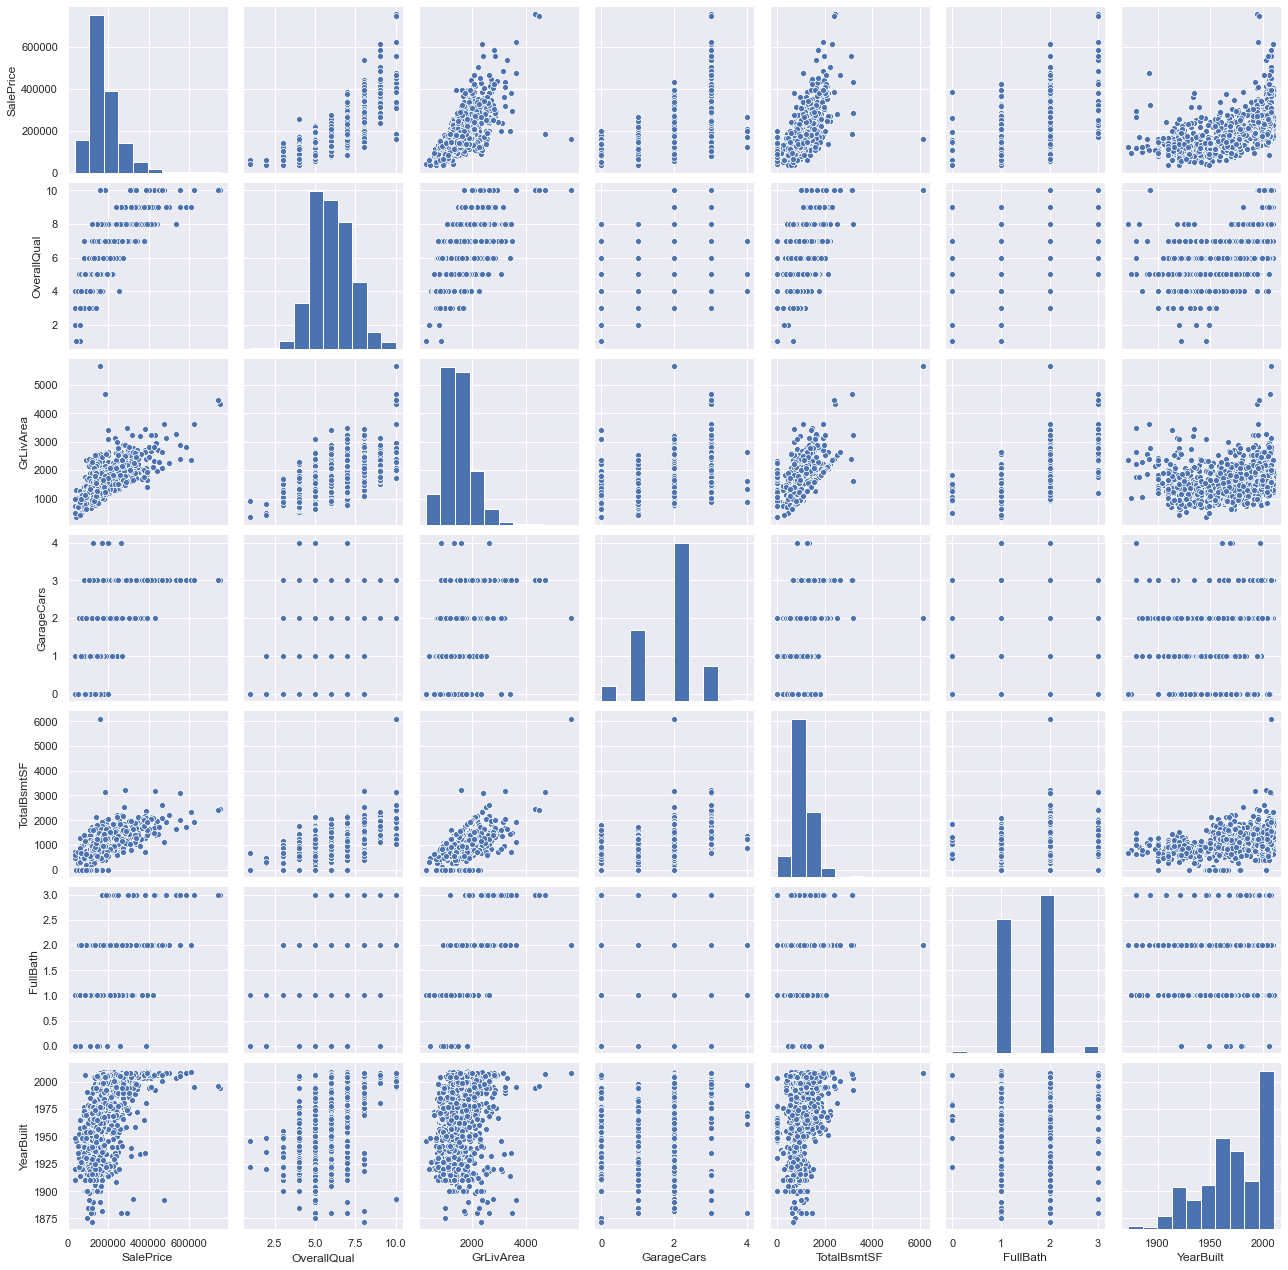

In [7]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_data[cols], size = 2.5)
plt.show()

In [8]:
train_Id = train_data['Id']
test_Id = test_data['Id']
len_train = train_data.shape[0]
len_test = test_data.shape[0]
housing = pd.concat([test_data, test_data], sort=False)
# housing.info()
train_data.shape

(1460, 81)

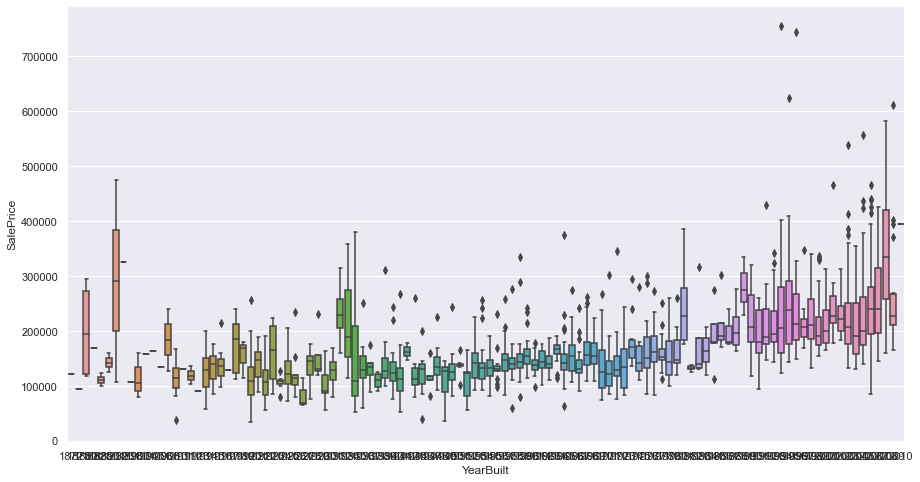

In [9]:
plt.figure(figsize=(15,8))
sns.boxplot(train_data.YearBuilt, train_data.SalePrice)

In [10]:
train_data.isnull().sum()[lambda x: x>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

## 特征说明


In [12]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [16]:
train_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
train_corr = train_data.drop('Id',axis=1).corr()
train_corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


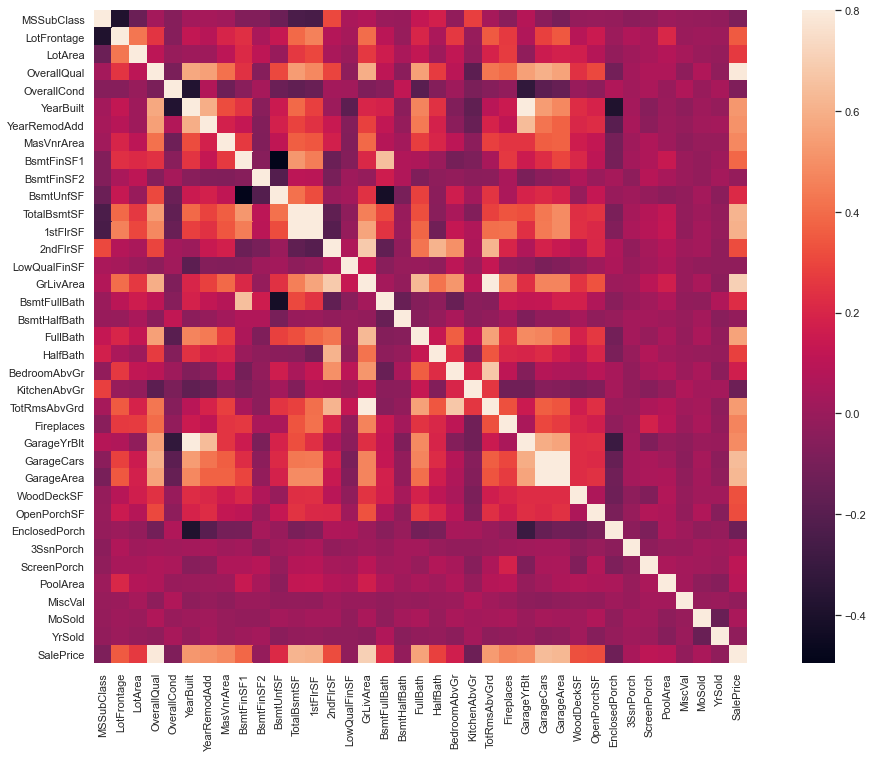

In [20]:
a = plt.subplots(figsize=(20, 12))
a = sns.heatmap(train_corr, vmax=.8, square=True)

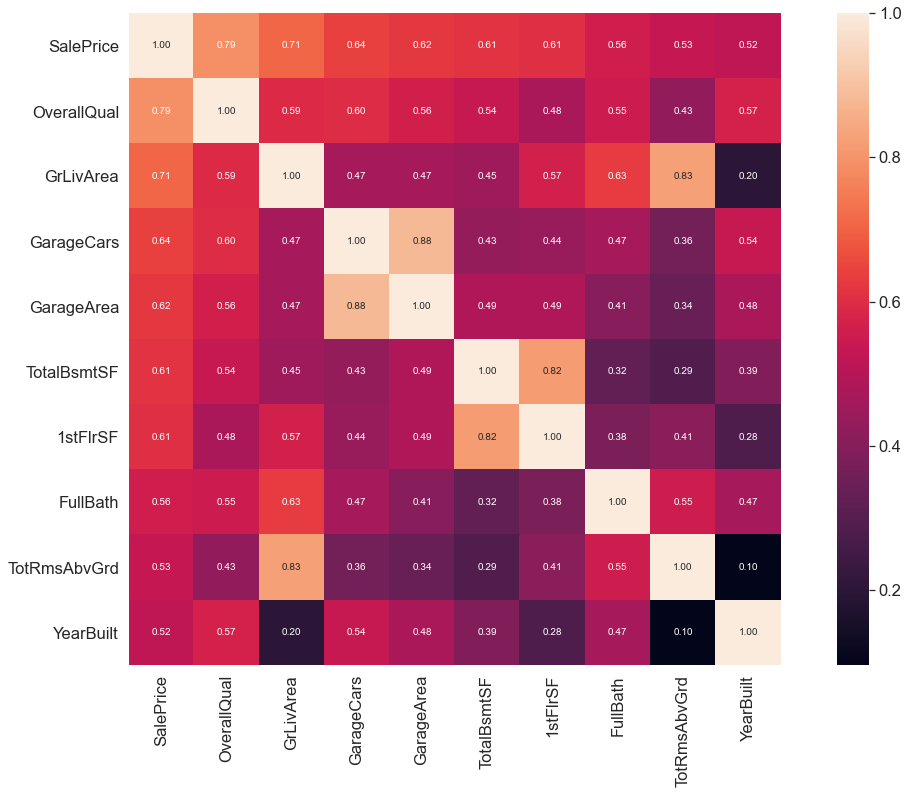

In [22]:
k = 10
cols = train_corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.5)
hm = plt.subplots(figsize=(20, 12))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

D:\devenv\Anaconda3\envs\kaggleenv\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


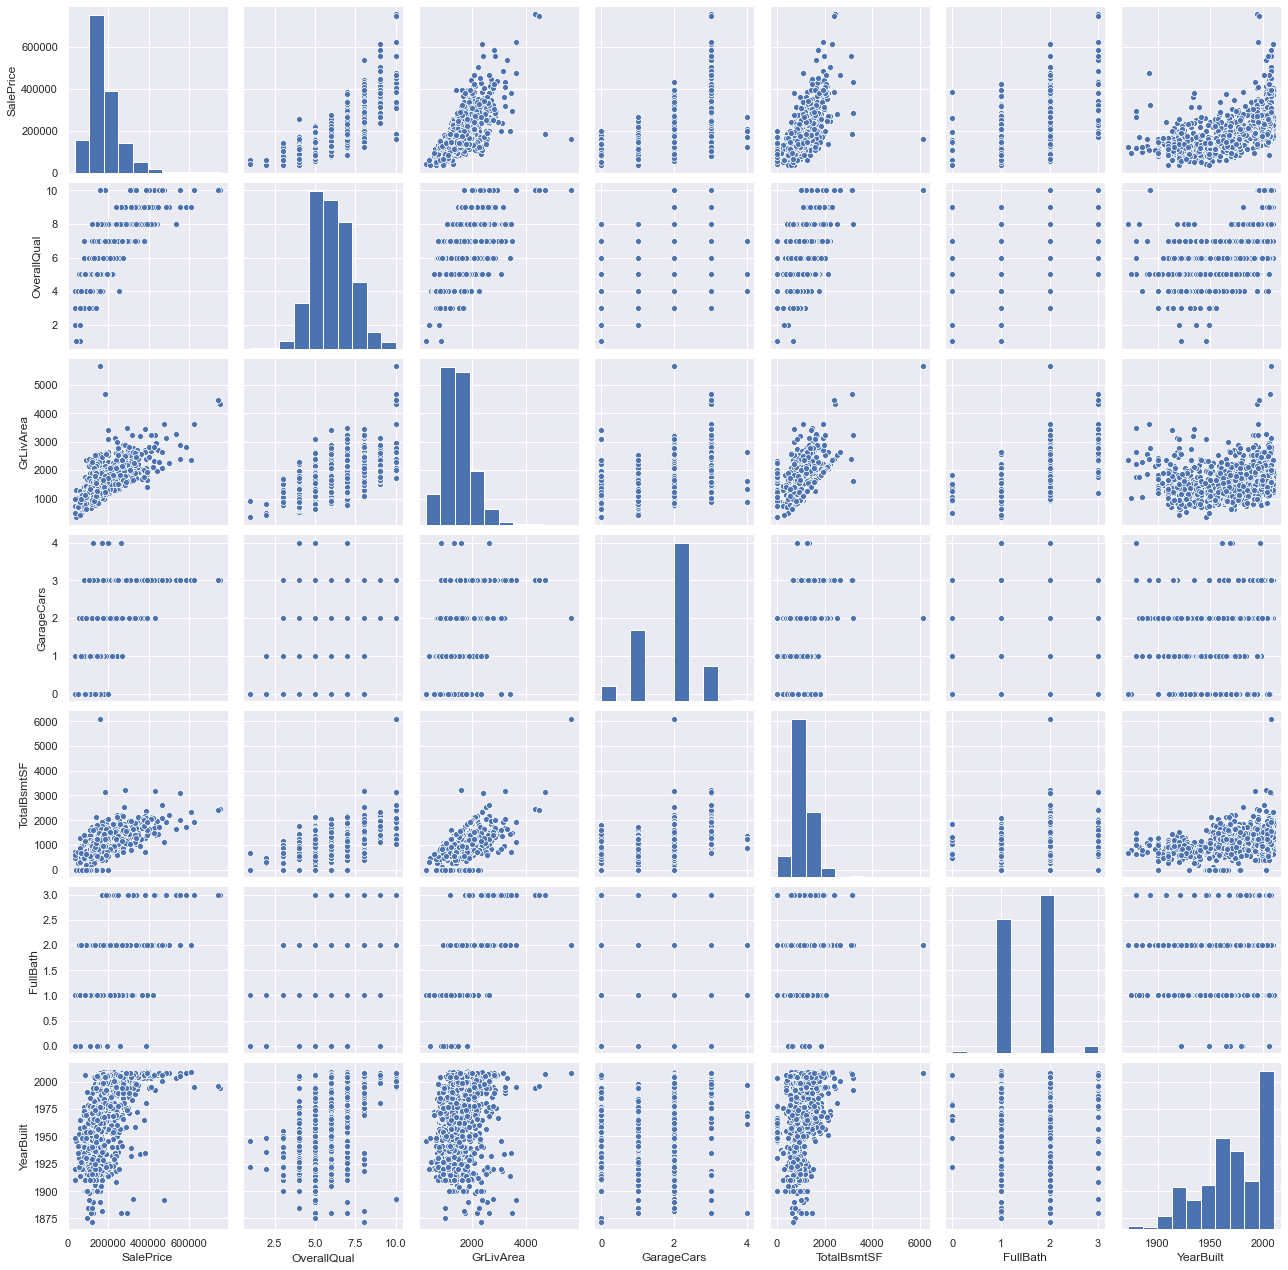

In [24]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_data[cols], size = 2.5)
plt.show();

In [26]:
train_data[['SalePrice', 'OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   SalePrice    1460 non-null   int64
 1   OverallQual  1460 non-null   int64
 2   GrLivArea    1460 non-null   int64
 3   GarageCars   1460 non-null   int64
 4   TotalBsmtSF  1460 non-null   int64
 5   FullBath     1460 non-null   int64
 6   YearBuilt    1460 non-null   int64
dtypes: int64(7)
memory usage: 80.0 KB


## 特征工程

In [30]:
test_data['SalePrice'] = None
train_test = pd.concat((train_data, test_data)).reset_index(drop=True)


In [31]:
total= train_test.isnull().sum().sort_values(ascending=False)
percent = (train_test.isnull().sum()/train_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Lost Percent'])

print(missing_data[missing_data.isnull().values==False].sort_values('Total', axis=0, ascending=False).head(20))

              Total  Lost Percent
PoolQC         2909      0.996574
PoolQC         2909      0.996574
MiscFeature    2814      0.964029
MiscFeature    2814      0.964029
Alley          2721      0.932169
Alley          2721      0.932169
Fence          2348      0.804385
Fence          2348      0.804385
SalePrice      1459      0.499829
SalePrice      1459      0.499829
FireplaceQu    1420      0.486468
FireplaceQu    1420      0.486468
LotFrontage     486      0.166495
LotFrontage     486      0.166495
GarageFinish    159      0.054471
GarageCond      159      0.054471
GarageCond      159      0.054471
GarageFinish    159      0.054471
GarageQual      159      0.054471
GarageYrBlt     159      0.054471


In [34]:
train_test = train_test.drop((missing_data[missing_data['Total'] > 1]).index.drop('SalePrice') , axis=1)
tmp = train_test[train_test['SalePrice'].isnull().values==False]
print(tmp.isnull().sum().max())

1


Skewness: 1.882876
Kurtosis: 6.536282


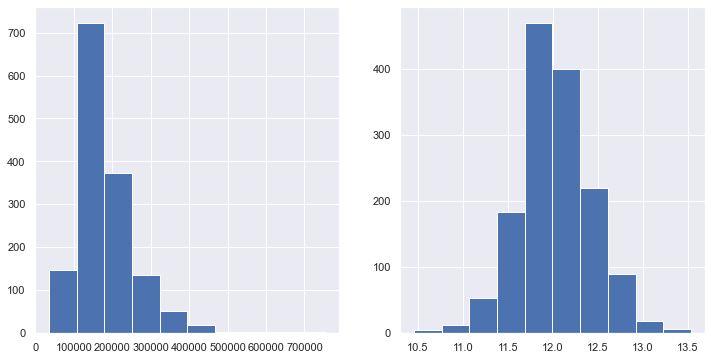

In [37]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.hist(train_data.SalePrice)
ax2.hist(np.log1p(train_data.SalePrice))

print("Skewness: %f" % train_data['SalePrice'].skew())
print("Kurtosis: %f" % train_data['SalePrice'].kurt())

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


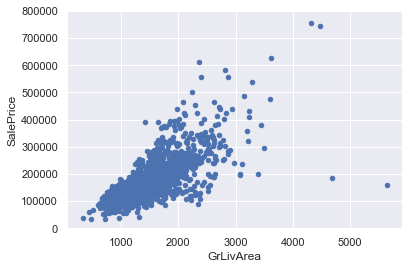

In [39]:
var = 'GrLivArea'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [40]:
print(train_data.sort_values(by='GrLivArea', ascending = False)[:2])
tmp = train_test[train_test['SalePrice'].isnull().values==False]

train_test = train_test.drop(tmp[tmp['Id'] == 1299].index)
train_test = train_test.drop(tmp[tmp['Id'] == 524].index)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   
523    524          60       RL        130.0    40094   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
1298         Bnk    AllPub  ...      480     Gd   NaN         NaN       0   
523          Bnk    AllPub  ...        0    NaN   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1298      1   2008       New        Partial     160000  
523      10   2007       New        Partial     184750  

[2 rows x 81 columns]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


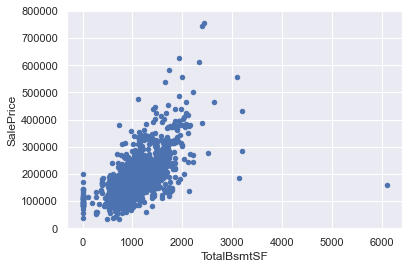

In [41]:
var = 'TotalBsmtSF'
data = pd.concat([train_data['SalePrice'],train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice',ylim=(0,800000))

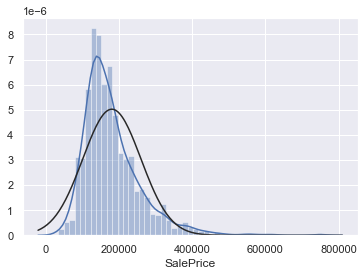

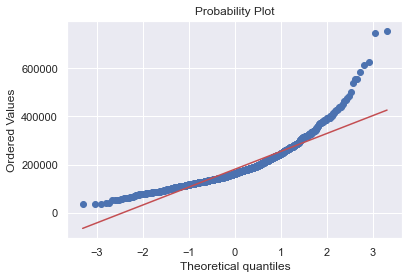

In [43]:
sns.distplot(train_data['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'], plot=plt)

In [44]:
train_test['SalePrice'] = [i if i is None else np.log1p(i) for i in train_test['SalePrice']]

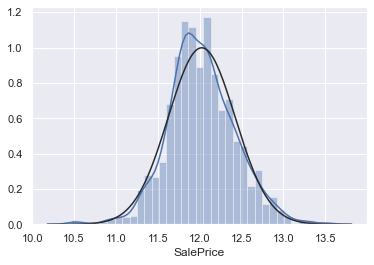

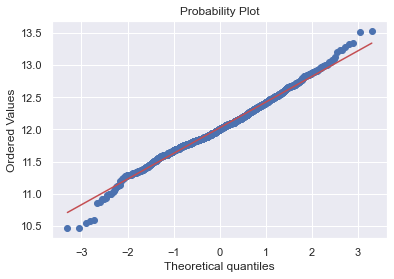

In [45]:
tmp = train_test[train_test['SalePrice'].isnull().values==False]

sns.distplot(tmp[tmp['SalePrice'] !=0]['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(tmp['SalePrice'], plot=plt)

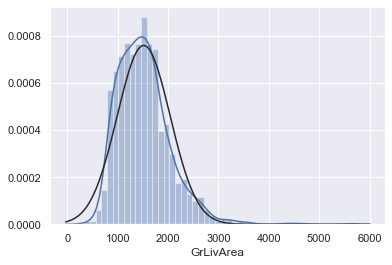

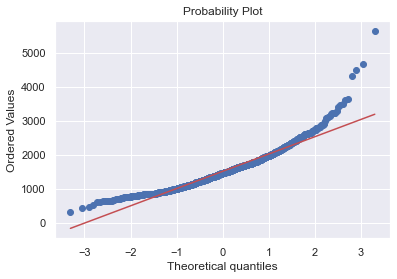

In [47]:
sns.distplot(train_data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['GrLivArea'], plot=plt)

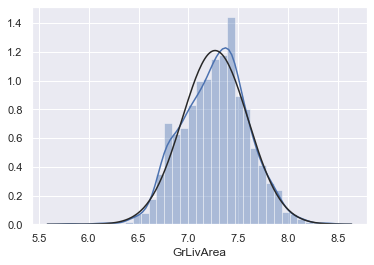

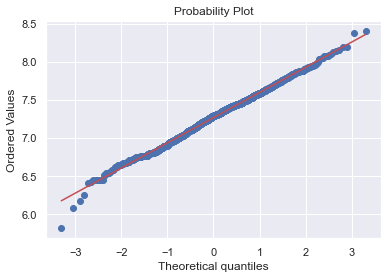

In [48]:
train_test['GrLivArea'] = [i if i is None else np.log1p(i) for i in train_test['GrLivArea']]

# 绘制变换后的直方图和正态概率图：
tmp = train_test[train_test['SalePrice'].isnull().values==False]
sns.distplot(tmp['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(tmp['GrLivArea'], plot=plt)

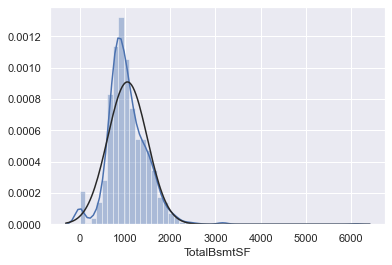

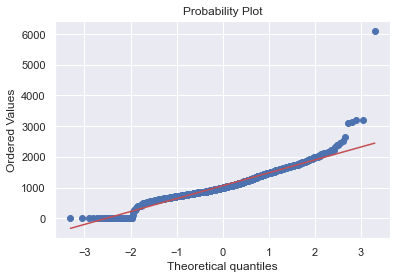

In [49]:
sns.distplot(train_data['TotalBsmtSF'],fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['TotalBsmtSF'],plot=plt)

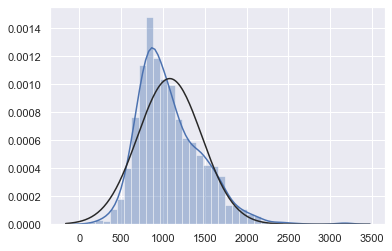

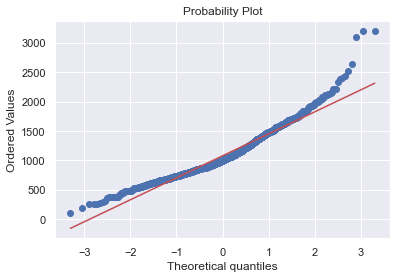

In [50]:
tmp = train_test[train_test['SalePrice'].isnull().values==False]

tmp = np.array(tmp.loc[tmp['TotalBsmtSF']>0, ['TotalBsmtSF']])[:, 0]
sns.distplot(tmp, fit=norm)
fig = plt.figure()
res = stats.probplot(tmp, plot=plt)

In [52]:
print(train_data.loc[train_data['TotalBsmtSF']==0, ['TotalBsmtSF']].count())
train_data.loc[train_data['TotalBsmtSF']==0,'TotalBsmtSF'] = 1
print(train_data.loc[train_data['TotalBsmtSF']==1, ['TotalBsmtSF']].count())

TotalBsmtSF    37
dtype: int64
TotalBsmtSF    37
dtype: int64


In [53]:
tmp = train_test[train_test['SalePrice'].isnull().values==False]

print(tmp['TotalBsmtSF'].head(10))
train_test['TotalBsmtSF']= np.log1p(train_test['TotalBsmtSF'])

tmp = train_test[train_test['SalePrice'].isnull().values==False]
print(tmp['TotalBsmtSF'].head(10))

0     856.0
1    1262.0
2     920.0
3     756.0
4    1145.0
5     796.0
6    1686.0
7    1107.0
8     952.0
9     991.0
Name: TotalBsmtSF, dtype: float64
0    6.753438
1    7.141245
2    6.825460
3    6.629363
4    7.044033
5    6.680855
6    7.430707
7    7.010312
8    6.859615
9    6.899723
Name: TotalBsmtSF, dtype: float64


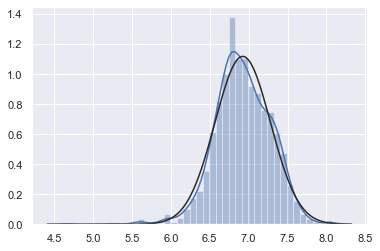

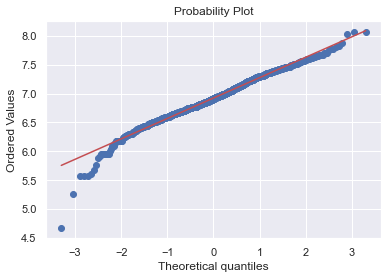

In [54]:
tmp = train_test[train_test['SalePrice'].isnull().values==False]

tmp = np.array(tmp.loc[tmp['TotalBsmtSF']>0, ['TotalBsmtSF']])[:, 0]
sns.distplot(tmp, fit=norm)
fig = plt.figure()
res = stats.probplot(tmp, plot=plt)

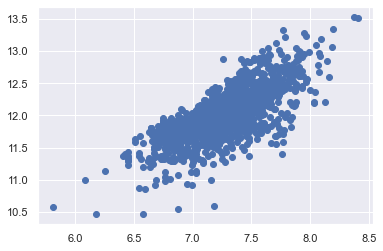

In [55]:
tmp = train_test[train_test['SalePrice'].isnull().values==False]

plt.scatter(tmp['GrLivArea'], tmp['SalePrice'])

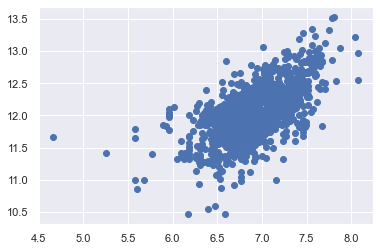

In [56]:
tmp = train_test[train_test['SalePrice'].isnull().values==False]

plt.scatter(tmp[tmp['TotalBsmtSF']>0]['TotalBsmtSF'], tmp[tmp['TotalBsmtSF']>0]['SalePrice'])

In [57]:
tmp = train_test[train_test['SalePrice'].isnull().values==False]
tmp_1 = train_test[train_test['SalePrice'].isnull().values==True]

x_train = tmp[['OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]
y_train = tmp[["SalePrice"]].values.ravel()
x_test = tmp_1[['OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]


x_test["GarageCars"].fillna(x_test.GarageCars.median(), inplace=True)
x_test["TotalBsmtSF"].fillna(x_test.TotalBsmtSF.median(), inplace=True)

D:\devenv\Anaconda3\envs\kaggleenv\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [91]:
tmp_test = pd.read_csv('data/test.csv')
tmp_submission = pd.read_csv('data/sample_submission.csv')
test_ID = tmp_test.Id
test_ID

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

0.16640047874484276


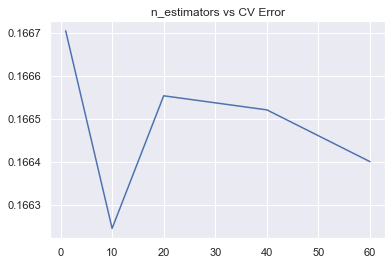

In [58]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

ridge = Ridge(alpha=0.1)

# bagging 把很多小的分类器放在一起，每个train随机的一部分数据，然后把它们的最终结果综合起来（多数投票）
# bagging 算是一种算法框架
params = [1, 10, 20, 40, 60]
test_scores = []
for param in params:
    clf = BaggingRegressor(base_estimator=ridge, n_estimators=param)
    # cv=5表示cross_val_score采用的是k-fold cross validation的方法，重复5次交叉验证
    # scoring='precision'、scoring='recall'、scoring='f1', scoring='neg_mean_squared_error' 方差值
    test_score = np.sqrt(-cross_val_score(clf, x_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

print(test_score.mean())
plt.plot(params, test_scores)
plt.title('n_estimators vs CV Error')
plt.show()

## 模型选择

In [71]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

#定义交叉验证函数
n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train)
# np.sqrt(x)返回x的平方根
# cross_val_score方法： 
# 这个方法是对数据进行多次分割，然后训练多个模型并评分，每次分割不一样。之后我们用评分的均值来代表这个模型的得分。
# 方法重要参数是：cv代表计算多少次，分割次数；scoring代表方法。
# 损失函数
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)


# # 模型选择
## LASSO Regression :
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))
# Elastic Net Regression
ENet = make_pipeline(
    RobustScaler(), ElasticNet(
        alpha=0.0005, l1_ratio=.9, random_state=3))
#Kernel Ridge Regression
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
## Gradient Boosting Regression
GBoost = GradientBoostingRegressor(
    n_estimators=3000,
    learning_rate=0.05,
    max_depth=4,
    max_features='sqrt',
    min_samples_leaf=15,
    min_samples_split=10,
    loss='huber',
    random_state=5)
## XGboost
model_xgb = xgb.XGBRegressor(
    colsample_bytree=0.4603,
    gamma=0.0468,
    learning_rate=0.05,
    max_depth=3,
    min_child_weight=1.7817,
    n_estimators=2200,
    reg_alpha=0.4640,
    reg_lambda=0.8571,
    subsample=0.5213,
    silent=1,
    random_state=7,
    nthread=-1)
## lightGBM
model_lgb = lgb.LGBMRegressor(
    objective='regression',
    num_leaves=5,
    learning_rate=0.05,
    n_estimators=720,
    max_bin=55,
    bagging_fraction=0.8,
    bagging_freq=5,
    feature_fraction=0.2319,
    feature_fraction_seed=9,
    bagging_seed=9,
    min_data_in_leaf=6,
    min_sum_hessian_in_leaf=11)
## 对这些基本模型进行打分
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(KRR)
print(
    "Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(),
                                                          score.std()))
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1665 (0.0057)

ElasticNet score: 0.1665 (0.0057)

Kernel Ridge score: 0.1563 (0.0048)

Gradient Boosting score: 0.1642 (0.0091)

Xgboost score: 0.1559 (0.0052)

LGBM score: 0.1566 (0.0053)



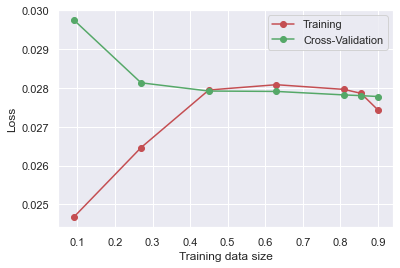

In [72]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import learning_curve

ridge = Ridge(alpha=0.1)

train_sizes, train_loss, test_loss = learning_curve(ridge, x_train, y_train, cv=10, 
                                                    scoring='neg_mean_squared_error',
                                                    train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9 , 0.95, 1])

# 训练误差均值
train_loss_mean = -np.mean(train_loss, axis = 1)
# 测试误差均值
test_loss_mean = -np.mean(test_loss, axis = 1)

# 绘制误差曲线
plt.plot(train_sizes/len(x_train), train_loss_mean, 'o-', color = 'r', label = 'Training')
plt.plot(train_sizes/len(x_train), test_loss_mean, 'o-', color = 'g', label = 'Cross-Validation')

plt.xlabel('Training data size')
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.show()

In [73]:
mode_br = BaggingRegressor(base_estimator=ridge, n_estimators=10)
mode_br.fit(x_train, y_train)
y_test = np.expm1(mode_br.predict(x_test))

In [92]:
# 模型融合
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin, clone

class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models

    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]

        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self

    # Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack(
            [model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)


# 评价这四个模型的好坏
averaged_models = AveragingModels(models=(ENet, GBoost, KRR, lasso))
score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(),
                                                              score.std()))



stacked_averaged_models = AveragingModels(models=(ENet, GBoost, KRR, lasso))
score = rmsle_cv(stacked_averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(),
                                                              score.std()))


def rmsle(y_train,y_pre):
    return np.sqrt(mean_squared_error(y_train, y_pre))
# 最终对模型的训练和预测
# StackedRegressor
stacked_averaged_models.fit(x_train, y_train)
stacked_train_pred = stacked_averaged_models.predict(x_train)
stacked_pred = np.expm1(stacked_averaged_models.predict(x_test))
print(rmsle(y_train, stacked_train_pred))

# XGBoost
model_xgb.fit(x_train, y_train)
xgb_train_pred = model_xgb.predict(x_train)
xgb_pred = np.expm1(model_xgb.predict(x_test))
print(rmsle(y_train, xgb_train_pred))
# lightGBM
model_lgb.fit(x_train, y_train)
lgb_train_pred = model_lgb.predict(x_train)
lgb_pred = np.expm1(model_lgb.predict(x_test))
print(rmsle(y_train, lgb_train_pred))
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train, stacked_train_pred * 0.70 + xgb_train_pred * 0.15 +
            lgb_train_pred * 0.15))
# 模型融合的预测效果
ensemble = stacked_pred * 0.70 + xgb_pred * 0.15 + lgb_pred * 0.15
# 保存结果
result = pd.DataFrame()
result['Id'] = test_ID
result['SalePrice'] = ensemble
# index=False 是用来除去行编号
result.to_csv('data/voting_result.csv', index=False)

 Averaged base models score: 0.1554 (0.0056)

 Averaged base models score: 0.1554 (0.0056)

0.1367705560659923
0.12455346427204675
0.13438386425854917
RMSLE score on train data:
0.13210227872593522
